In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the csv file of Global Water Consumption using pandas

gwc = pd.read_csv('C:\\Users\\User\\OneDrive - University of Hertfordshire\\global_water_consumption_2000_2025.csv', index_col = 'Year')

gwc.head()

,Country,Total Water Consumption (Billion m3),Per Capita Water Use (L/Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (mm),Groundwater Depletion Rate (%),Water Scarcity Level
Year,,,,,,,,,
2000,China,586.04,146.6,63.8,23.1,13.1,633.8,3.99,High
2001,China,590.09,161.4,63.7,23.2,13.2,854.9,4.16,High
2002,China,600.00,150.2,63.6,23.2,13.2,1280.2,4.24,Moderate
2003,China,610.45,162.5,63.5,23.3,13.3,900.1,4.40,High
2004,China,617.08,148.7,63.4,23.3,13.3,641.2,4.57,High


In [3]:
#Subseting the dataset to give out the three categories of water use

water_use = (gwc[[col for col in gwc.columns if 'Use (%)' in col]].copy())

water_use

,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%)
Year,,,
2000,63.8,23.1,13.1
2001,63.7,23.2,13.2
2002,63.6,23.2,13.2
2003,63.5,23.3,13.3
2004,63.4,23.3,13.3
...,...,...,...
2021,64.9,22.7,12.4
2022,64.8,22.8,12.5
2023,64.7,22.8,12.5


In [4]:
#Averaging the Global Water Consumption 

avrg_water_use = water_use.groupby('Year')[['Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)']].mean()

avrg_water_use

,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%)
Year,,,
2000,63.843333,19.584000,16.573333
2001,63.743333,19.635333,16.622667
2002,63.643333,19.684000,16.673333
2003,63.543333,19.735333,16.722667
2004,63.443333,19.784000,16.773333
2005,63.343333,19.835333,16.822667
2006,63.243333,19.884000,16.873333
2007,63.143333,19.935333,16.922667
2008,63.043333,19.984000,16.973333


In [5]:
def plot_water_use(avrg_water_use):

    '''
    
    Plotting the time series of Average water use in Agricultural, Industrial and Household 
    
    '''
    plt.figure(dpi = 144)
    #plottin
    Wuses = avrg_water_use.columns
    for use in Wuses:
        plt.plot(avrg_water_use.index,avrg_water_use[use], label = use)

    #formatting the chart
    plt.legend()
    plt.title('Averag Water Use (%)')
    plt.xlabel('Year')
    plt.ylabel('Average Water Use')
    plt.show()
    
    return

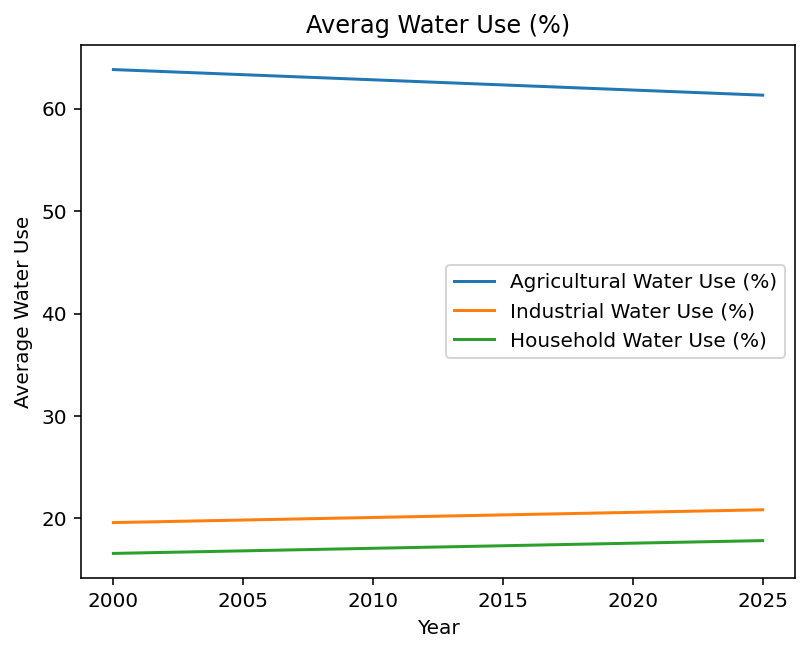

In [6]:
#plot the line graph of Agricultural, Industrial and Household

plot_water_use(avrg_water_use)

In [7]:
#Grouping the water scarcity level

wsc = gwc.groupby( 'Water Scarcity Level')['Total Water Consumption (Billion m3)'].sum()

wsc

Water Scarcity Level
Critical      1770.95
High         36611.64
Low         160267.84
Moderate     58019.30
Name: Total Water Consumption (Billion m3), dtype: float64

In [8]:
def plot_water_scacity_level(wsc):
    
    '''
    Plotting the water scarcity level
    
    '''
    plt.figure(dpi=144)
    
    #plotting chart by using pie chart
    wsc.plot(kind = 'pie',  autopct = '%1.1f%%')

    #formatting the chart
    plt.axis('Equal')
    plt.title('Water Scarcity Level')
    plt.show()
    
    return

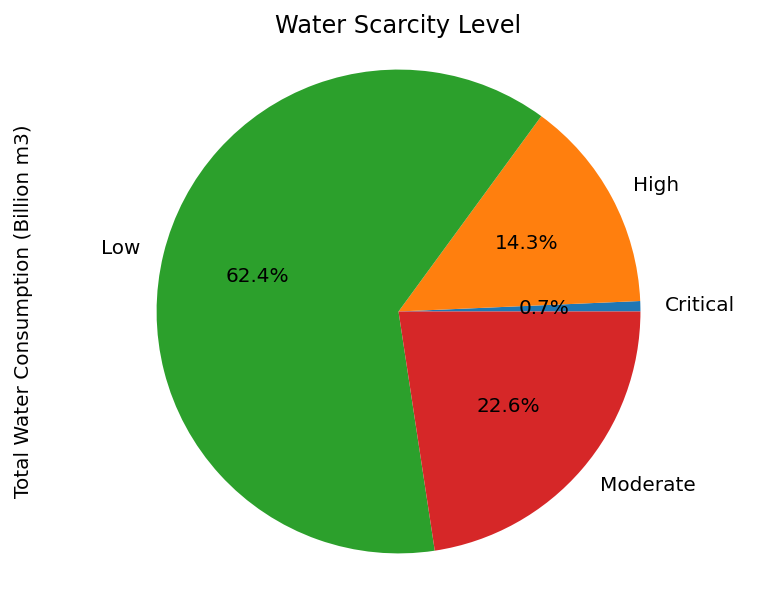

In [9]:
#pie chart for water scarcity level

plot_water_scacity_level(wsc)

In [18]:
def plot_water_use_box(water_use):
    
    """
    Plotting the water use as a boxplot
    """
    
    fig, ax = plt.subplots(dpi=144)
    
    water_use.boxplot(ax=ax, grid=False)
    
    #formatting
    plt.ylabel('Average Water Use')
    plt.show()
    
    return

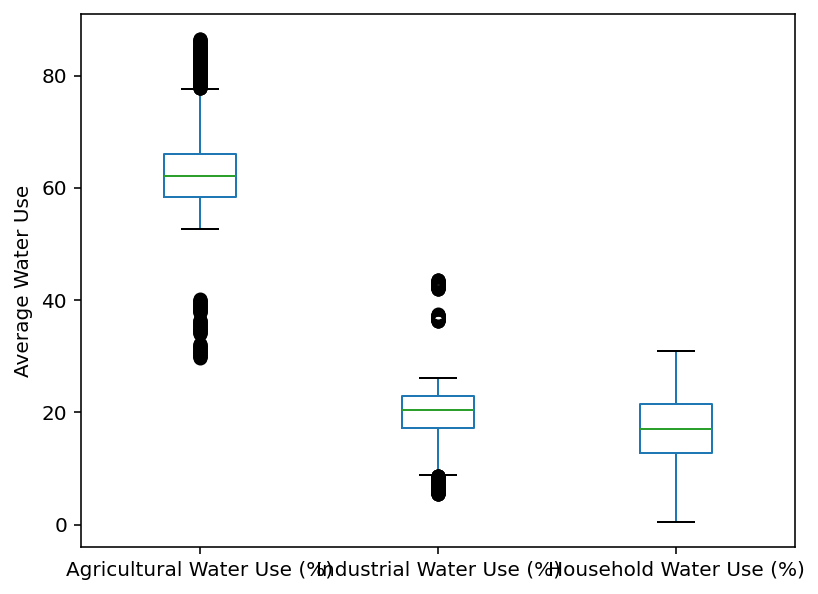

In [19]:
#plotting the boxplot

plot_water_use_box(water_use)